# STATION2

### Importer packages

In [35]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import joblib

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

### Présentation de la problématique et chargement des données
### Description de la base de données 

l'API nous fournit des données horaires sur la qualité de l'air et les conditions météorologiques, fournissant des informations sur différents polluants atmosphériques, la température, l'humidité, etc. Ces données peuvent être utilisées pour surveiller l'environnement et évaluer la qualité de l'air dans la région de la station spécifiée. L'API pourrait être utilisée pour récupérer ces données à des fins d'analyse, de suivi ou de visualisation.


- timestamp: L'heure à laquelle les mesures ont été prises.
- CO: La concentration de monoxyde de carbone en ppm (parties par million).
- T: La température en degrés Celsius.
- T. int.: La température interne (peut-être de l'appareil de mesure) en kelvins.
- NO2: La concentration de dioxyde d'azote en µg/m³ (microgrammes par mètre cube).
- O3: La concentration d'ozone en µg/m³.
- PM10: La concentration de particules fines (PM10) en µg/m³.
- PM2.5: La concentration de particules fines (PM2.5) en µg/m³.
- RH: L'humidité relative en pourcentage.




In [36]:
df = pd.read_csv("airflow.station2.csv")
df

,_id,date,CO_moyen,PM2.5_moyen
0,65709bbb119ba6d28706c16c,2022-12-06,0.512960,21.300000
1,65709bbb119ba6d28706c16d,2022-12-07,0.421532,12.458020
2,65709bbb119ba6d28706c16e,2022-12-08,0.393684,10.387500
3,65709bbb119ba6d28706c16f,2022-12-09,0.485723,8.419893
4,65709bbb119ba6d28706c170,2022-12-10,0.482676,6.627778
...,...,...,...,...
340,65709bbb119ba6d28706c2c0,2023-12-02,0.005328,11.788127
341,65709bbb119ba6d28706c2c1,2023-12-03,-0.167871,10.547177
342,65709bbb119ba6d28706c2c2,2023-12-04,-0.063040,13.094400
343,65709bbb119ba6d28706c2c3,2023-12-05,-0.120018,15.155583


In [37]:
# Renommage de la colonne 
df.rename(columns={'_id':'id','PM2.5_moyen':'PM_25_moyen'},inplace=True)
df

,id,date,CO_moyen,PM_25_moyen
0,65709bbb119ba6d28706c16c,2022-12-06,0.512960,21.300000
1,65709bbb119ba6d28706c16d,2022-12-07,0.421532,12.458020
2,65709bbb119ba6d28706c16e,2022-12-08,0.393684,10.387500
3,65709bbb119ba6d28706c16f,2022-12-09,0.485723,8.419893
4,65709bbb119ba6d28706c170,2022-12-10,0.482676,6.627778
...,...,...,...,...
340,65709bbb119ba6d28706c2c0,2023-12-02,0.005328,11.788127
341,65709bbb119ba6d28706c2c1,2023-12-03,-0.167871,10.547177
342,65709bbb119ba6d28706c2c2,2023-12-04,-0.063040,13.094400
343,65709bbb119ba6d28706c2c3,2023-12-05,-0.120018,15.155583


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           345 non-null    object 
 1   date         345 non-null    object 
 2   CO_moyen     345 non-null    float64
 3   PM_25_moyen  345 non-null    float64
dtypes: float64(2), object(2)
memory usage: 10.9+ KB


In [39]:
# Conversion de la date en datetime
from datetime import datetime
df['date']=pd.to_datetime(df['date'],infer_datetime_format=True)
df = df.set_index(["date"])
df = df.drop("id", axis=1)
df

,CO_moyen,PM_25_moyen
date,,
2022-12-06,0.512960,21.300000
2022-12-07,0.421532,12.458020
2022-12-08,0.393684,10.387500
2022-12-09,0.485723,8.419893
2022-12-10,0.482676,6.627778
...,...,...
2023-12-02,0.005328,11.788127
2023-12-03,-0.167871,10.547177
2023-12-04,-0.063040,13.094400


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 345 entries, 2022-12-06 to 2023-12-06
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CO_moyen     345 non-null    float64
 1   PM_25_moyen  345 non-null    float64
dtypes: float64(2)
memory usage: 8.1 KB


### Etape 1: Identification du modèle
### Analyse des données
### Représentation graphique

In [41]:
df_co = df.iloc[:, [0]]
df_co


,CO_moyen
date,
2022-12-06,0.512960
2022-12-07,0.421532
2022-12-08,0.393684
2022-12-09,0.485723
2022-12-10,0.482676
...,...
2023-12-02,0.005328
2023-12-03,-0.167871
2023-12-04,-0.063040


In [42]:
df_pm = df.iloc[:, [1]]
df_pm

,PM_25_moyen
date,
2022-12-06,21.300000
2022-12-07,12.458020
2022-12-08,10.387500
2022-12-09,8.419893
2022-12-10,6.627778
...,...
2023-12-02,11.788127
2023-12-03,10.547177
2023-12-04,13.094400


##### On travaille d'abord sur la prédiction du CO moyen ensuite on va se concentré sur le pm2.5 moyen

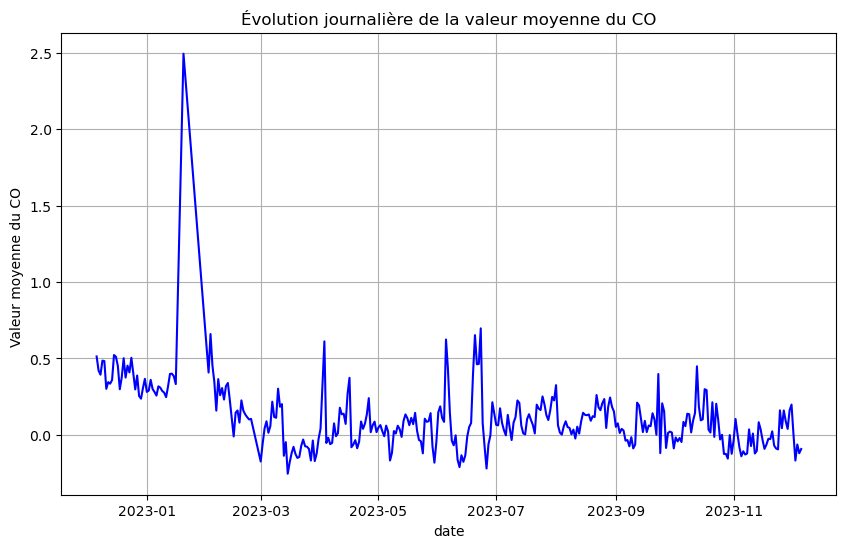

In [43]:
# Créer le graphique
plt.figure(figsize=(10, 6))
plt.plot(df_co.index, df_co['CO_moyen'], color='blue')
plt.title('Évolution journalière de la valeur moyenne du CO')
plt.xlabel('date')
plt.ylabel('Valeur moyenne du CO ')
plt.grid(True)
plt.show()

On peut voir graphiquement que la série n'est pas stationnaire

### Test de stationnarité

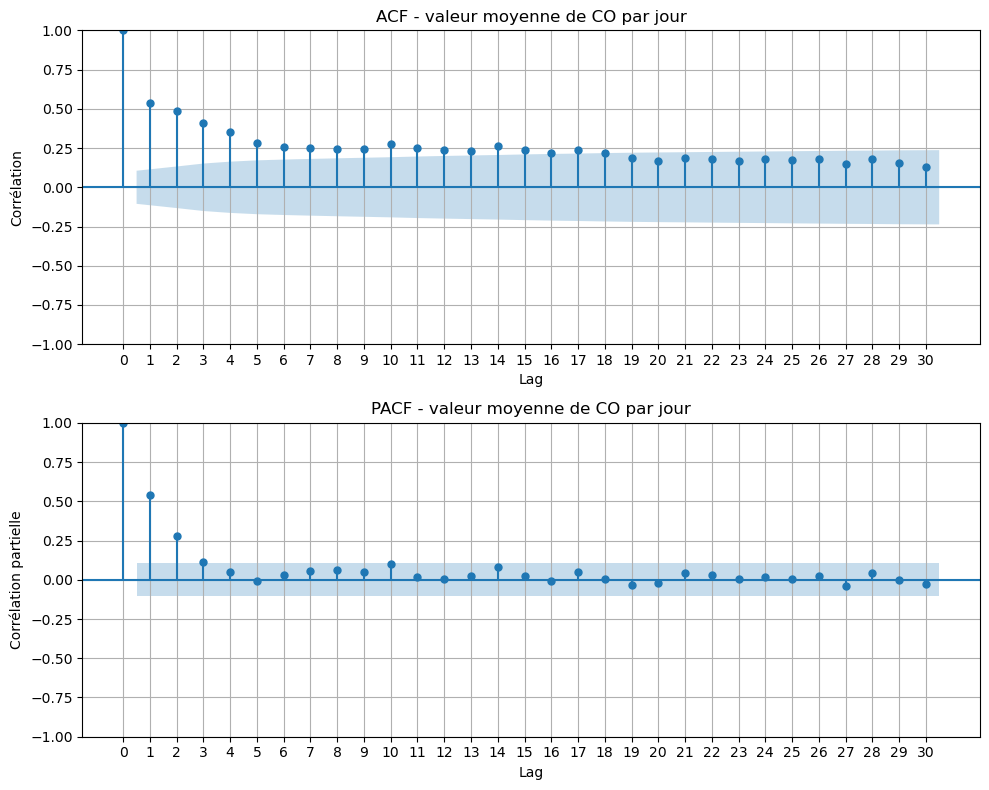

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Créer les subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Tracer l'ACF
plot_acf(df_co['CO_moyen'], lags=30, zero=True, ax=ax1)
ax1.set_title('ACF - valeur moyenne de CO par jour')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Corrélation')
ax1.grid(True)

# Ajuster les graduations sur l'axe x pour l'ACF
ax1.set_xticks(np.arange(0, 31, 1))

# Tracer le PACF
plot_pacf(df_co['CO_moyen'], lags=30, zero=True, ax=ax2)
ax2.set_title('PACF - valeur moyenne de CO par jour')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Corrélation partielle')
ax2.grid(True)

# Ajuster les graduations sur l'axe x pour le PACF
ax2.set_xticks(np.arange(0, 31, 1))

# Ajuster les subplots
plt.tight_layout()

# Afficher le graphique
plt.show()

l'ACF nous montre une décroissance regulière lente donc ceci nous confirme ce qu'on nous avons vu graphiquement la serie n'est pas stationnaire


### Rendre la série stationnaire

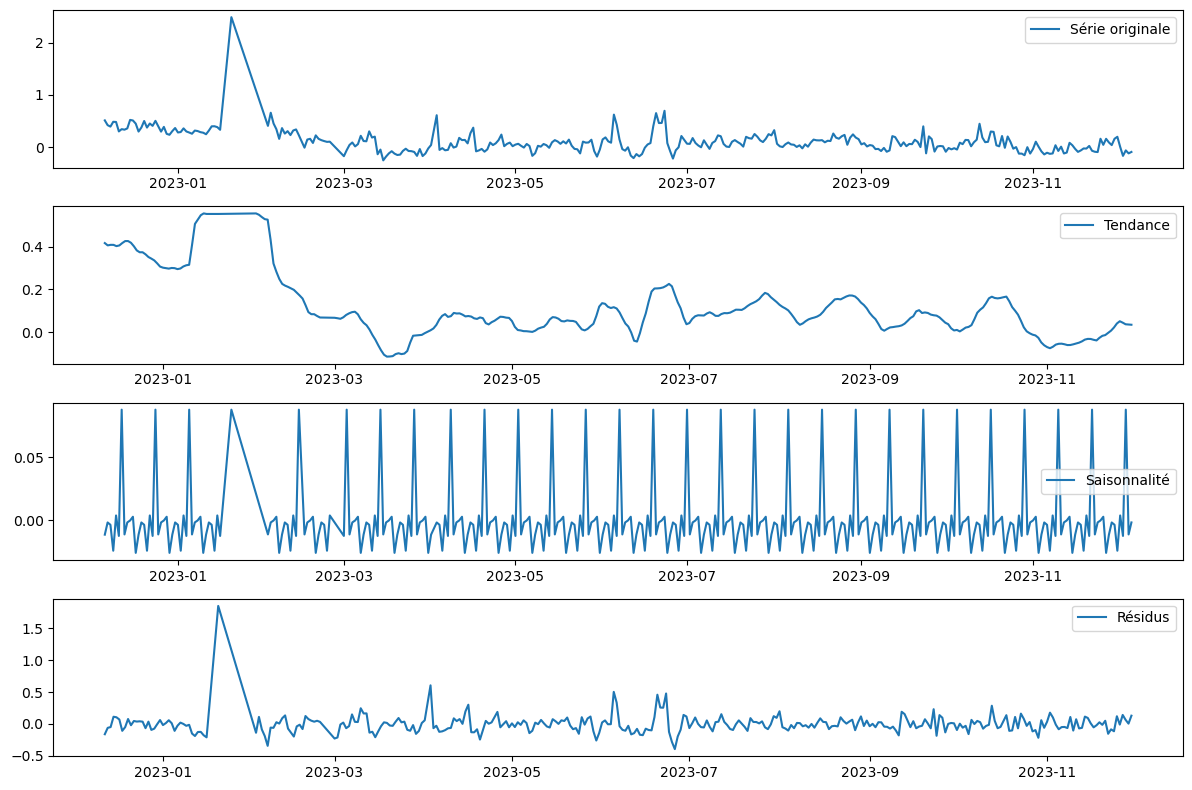

In [45]:
# Effectuer la décomposition saisonnière
decomposition = seasonal_decompose(df_co['CO_moyen'], model='additive', period=12)


# Extraire les composantes de la décomposition
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Afficher les composantes de la décomposition
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df_co['CO_moyen'], label='Série originale')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Tendance')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Saisonnalité')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Résidus')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

### Différentciation (Stationnarisation)

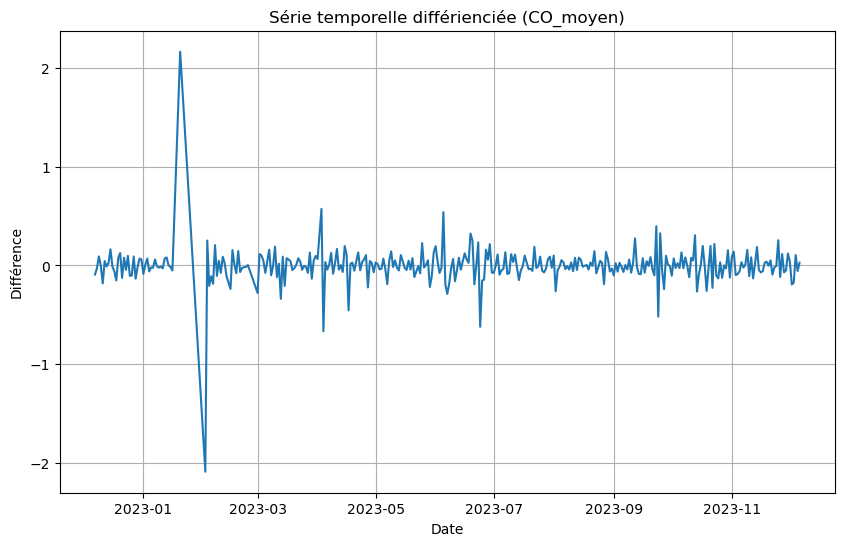

In [46]:
# Différenciation pour rendre la série stationnaire
differenced = df_co['CO_moyen'].diff().dropna()

# Afficher la série différienciée
plt.figure(figsize=(10, 6))
plt.plot(differenced)
plt.title('Série temporelle différienciée (CO_moyen)')
plt.xlabel('Date')
plt.ylabel('Différence')
plt.grid(True)
plt.show()

##### faire le test de adfuller pour vérifié la stationnarité de la série différenciée

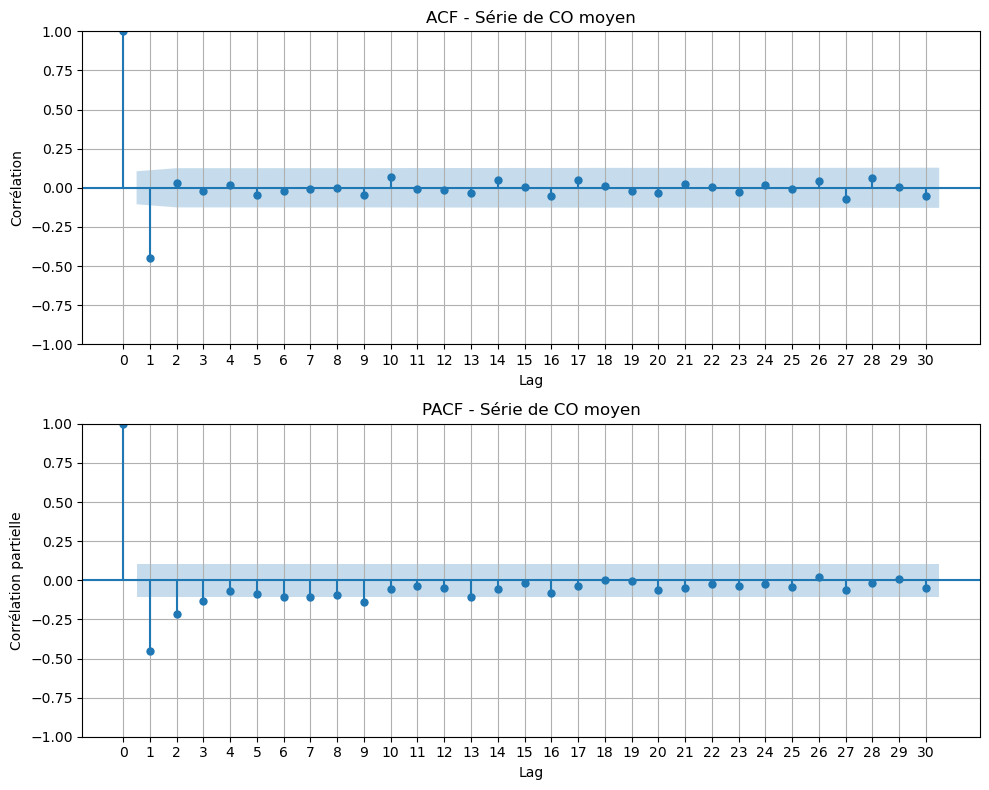

In [47]:
# Créer les subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Tracer l'ACF
plot_acf(differenced, lags=30, zero=True, ax=ax1)
ax1.set_title('ACF - Série de CO moyen')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Corrélation')
ax1.grid(True)

# Ajuster les graduations sur l'axe x pour l'ACF
ax1.set_xticks(np.arange(0, 31, 1))

# Tracer le PACF
plot_pacf(differenced, lags=30, zero=True, ax=ax2)
ax2.set_title('PACF - Série de CO moyen')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Corrélation partielle')
ax2.grid(True)

# Ajuster les graduations sur l'axe x pour le PACF
ax2.set_xticks(np.arange(0, 31, 1))

# Ajuster les subplots
plt.tight_layout()

# Afficher le graphique
plt.show()


On remarque qu'on a plus cette décroissante lente on peut dire que la série différencié est stationnaire, faisons test de adfuller pour vérifier

In [48]:
# Analyse de la stationnarité de la variable
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

# Effectuer le test de Dickey-Fuller augmenté
result = adfuller(differenced)

# Formater les résultats dans un tableau
table = [
    ['Valeur de test', result[0]],
    ['P-valeur', result[1]],
    ['Conclusion', 'La série est stationnaire' if result[1] < 0.05 else 'La série est non stationnaire']
]

# Afficher les résultats sous forme de tableau
print(tabulate(table, headers=['Métrique', 'Valeur'], tablefmt='github'))

| Métrique       | Valeur                    |
|----------------|---------------------------|
| Valeur de test | -9.87216662215791         |
| P-valeur       | 3.9682813736630715e-17    |
| Conclusion     | La série est stationnaire |


### Identification de l'ordre p,d,q

In [49]:
# Séparer les données en ensemble d'entraînement et ensemble de test avec les indices
train_data = df_co['CO_moyen'][:-15]
test_data = df_co['CO_moyen'][-15:]

# Séparer les indices correspondants
train_index = df_co.index[:-15]
test_index = df_co.index[-15:]

# Assurez-vous que les index sont de type datetime
train_data.index = pd.to_datetime(train_index)
test_data.index = pd.to_datetime(test_index)


#### Estimation du modèle¶ avec selection automatique du meilleur modele

In [50]:
#!pip install pmdarima

import pmdarima as pm

# Séparer les données en ensemble d'entraînement et ensemble de test
train_data = df['CO_moyen'][:-15]
test_data = df['CO_moyen'][-15:]

# Utiliser auto_arima pour trouver le meilleur modèle ARIMA
model = pm.auto_arima(train_data)

print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  330
Model:               SARIMAX(2, 1, 1)   Log Likelihood                 106.891
Date:                Sat, 09 Dec 2023   AIC                           -205.781
Time:                        23:09:18   BIC                           -190.597
Sample:                             0   HQIC                          -199.724
                                - 330                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2679      0.034      7.890      0.000       0.201       0.335
ar.L2          0.1820      0.062      2.916      0.004       0.060       0.304
ma.L1         -0.9367      0.031    -29.952      0.0

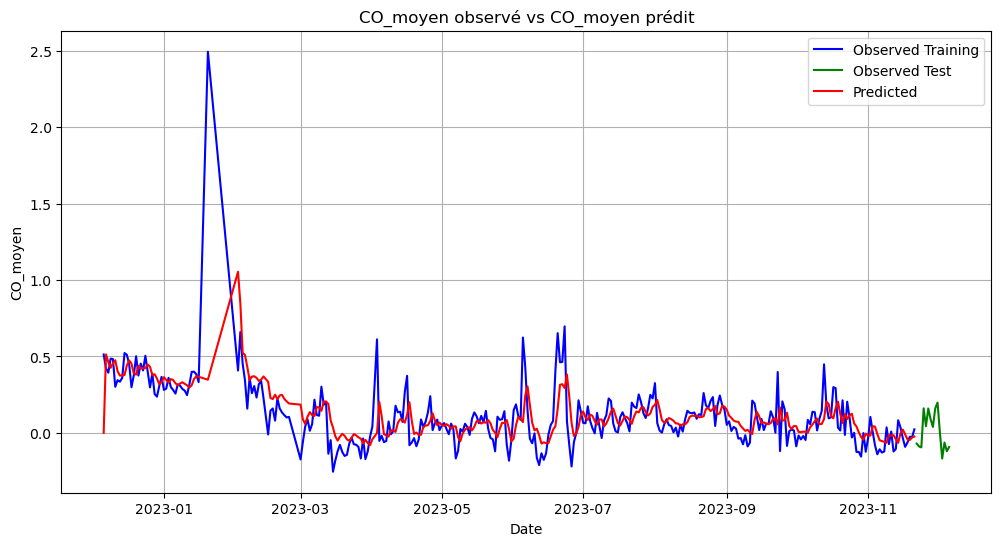

In [51]:
# Faire des prédictions sur l'ensemble d'entraînement
train_pred, train_confint = model.predict_in_sample(return_conf_int=True)

# Faire des prédictions sur l'ensemble de test
n_periods = len(test_data)
predicted, confint = model.predict(n_periods=n_periods, return_conf_int=True)

# Concaténer les prédictions pour l'ensemble d'entraînement et de test
all_predictions = pd.concat([pd.Series(train_pred, index=train_data.index), 
                             pd.Series(predicted, index=test_data.index)], 
                            axis=0)

# Tracer les valeurs réelles et les prédictions pour l'ensemble d'entraînement et de test
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Observed Training', color='blue')
plt.plot(test_data, label='Observed Test', color='green')
plt.plot(all_predictions, label='Predicted', color='red')

plt.xlabel('Date')
plt.ylabel('CO_moyen')
plt.title('CO_moyen observé vs CO_moyen prédit')
plt.legend()
plt.grid(True)
plt.show()


In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score


# Calculer les mesures de performance sur l'ensemble d'entraînement
train_mae = mean_absolute_error(train_data, train_pred)
train_mse = mean_squared_error(train_data, train_pred)
train_rmse = mean_squared_error(train_data, train_pred, squared=False)
train_r2 = r2_score(train_data, train_pred)

# Calculer les mesures de performance sur l'ensemble de test
test_mae = mean_absolute_error(test_data, predicted)
test_mse = mean_squared_error(test_data, predicted)
test_rmse = mean_squared_error(test_data, predicted, squared=False)
test_r2 = r2_score(test_data, predicted)

# Créer un DataFrame pour afficher les mesures de performance
performance_df = pd.DataFrame({
    'Métrique': ['MAE', 'MSE', 'RMSE'],
    'Ensemble d\'entraînement': [train_mae, train_mse, train_rmse],
    'Ensemble de test': [test_mae, test_mse, test_rmse]
})

print(performance_df)

  Métrique  Ensemble d'entraînement  Ensemble de test
0      MAE                 0.098462          0.105588
1      MSE                 0.031195          0.014304
2     RMSE                 0.176621          0.119601


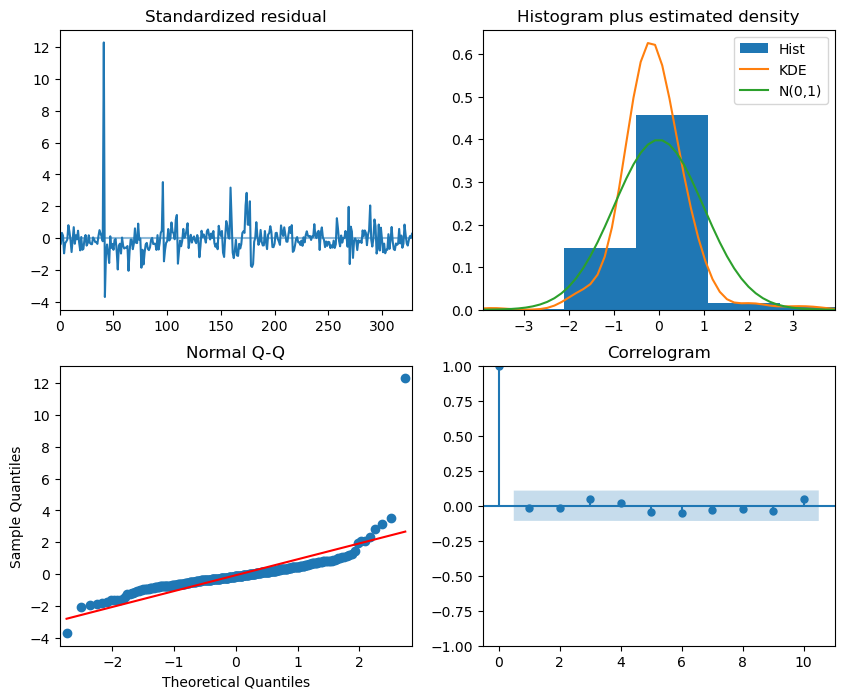

In [53]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

- Résidu standardisé : Les erreurs résiduelles semblent fluctuer autour d'une moyenne de zéro et ont une variance uniforme.
- Histogramme : Le tracé de la densité suggère une distribution normale avec une moyenne légèrement décalée vers la droite.
- Quantiles théoriques : La plupart des points sont parfaitement alignés sur la ligne rouge. Tout écart significatif indique que la distribution est asymétrique.
- Corrélogramme : Le corrélogramme (ou graphique ACF) montre que les erreurs résiduelles ne sont pas autocorrélées. Le tracé ACF impliquerait qu'il existe un modèle dans les erreurs résiduelles qui n'est pas expliqué par le modèle. Nous devrons donc chercher d'autres X (prédicteurs) pour le modèle.
Dans l'ensemble, le modèle semble bien adapté. Utilisons-le donc pour faire des prévisions.




# Prédiction de PM2.5 moyen

In [54]:
df_pm


,PM_25_moyen
date,
2022-12-06,21.300000
2022-12-07,12.458020
2022-12-08,10.387500
2022-12-09,8.419893
2022-12-10,6.627778
...,...
2023-12-02,11.788127
2023-12-03,10.547177
2023-12-04,13.094400


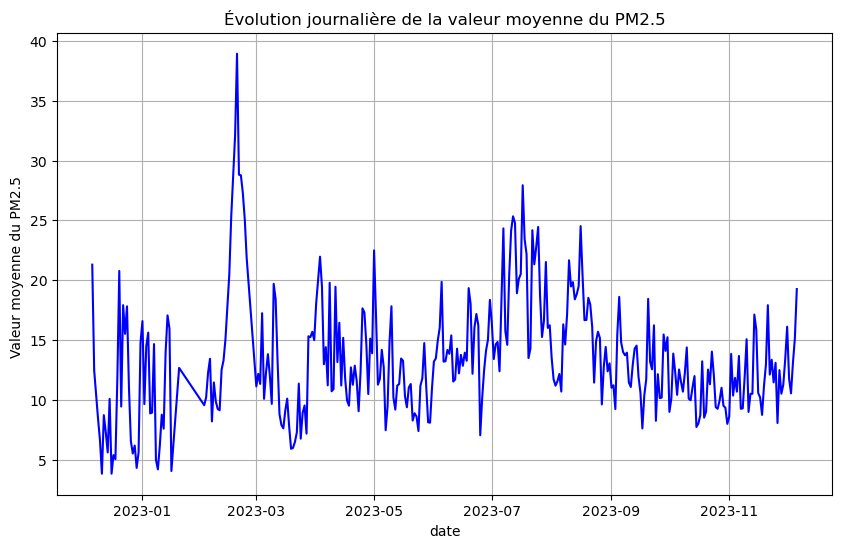

In [55]:
# Créer le graphique
plt.figure(figsize=(10, 6))
plt.plot(df_co.index, df_pm['PM_25_moyen'], color='blue')
plt.title('Évolution journalière de la valeur moyenne du PM2.5')
plt.xlabel('date')
plt.ylabel('Valeur moyenne du PM2.5 ')
plt.grid(True)
plt.show()

On peut voir graphiquement que la série n'est pas stationnaire

### Test de stationnarité

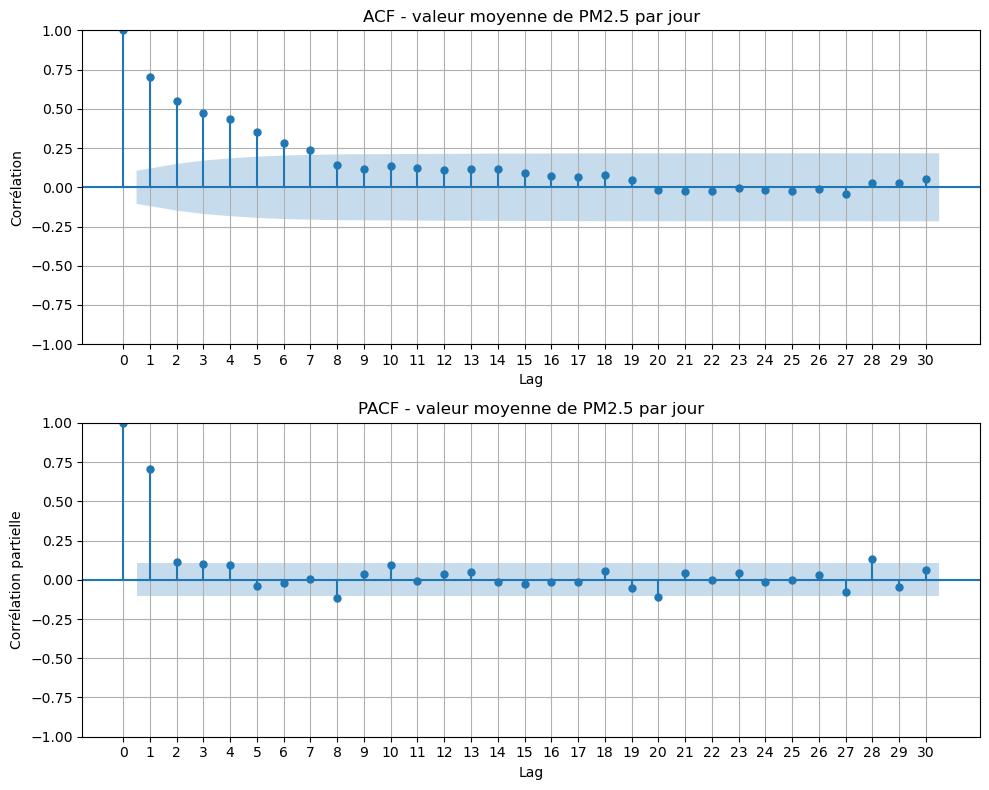

In [56]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Créer les subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Tracer l'ACF
plot_acf(df_pm['PM_25_moyen'], lags=30, zero=True, ax=ax1)
ax1.set_title('ACF - valeur moyenne de PM2.5 par jour')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Corrélation')
ax1.grid(True)

# Ajuster les graduations sur l'axe x pour l'ACF
ax1.set_xticks(np.arange(0, 31, 1))

# Tracer le PACF
plot_pacf(df_pm['PM_25_moyen'], lags=30, zero=True, ax=ax2)
ax2.set_title('PACF - valeur moyenne de PM2.5 par jour')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Corrélation partielle')
ax2.grid(True)

# Ajuster les graduations sur l'axe x pour le PACF
ax2.set_xticks(np.arange(0, 31, 1))

# Ajuster les subplots
plt.tight_layout()

# Afficher le graphique
plt.show()

l'ACF nous montre une décroissance regulière lente donc ceci nous confirme ce qu'on nous avons vu graphiquement la serie n'est pas stationnaire

### Différentciation (Stationnarisation)

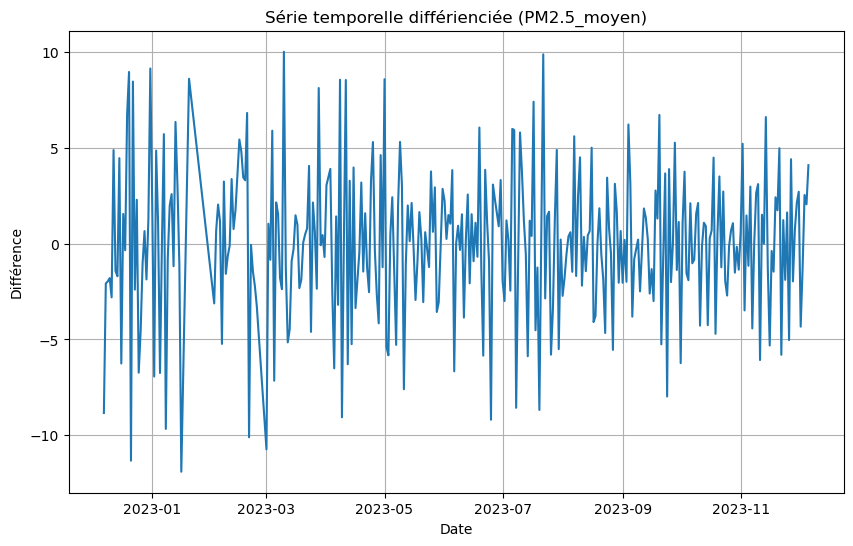

In [57]:

# Différenciation pour rendre la série stationnaire
differenced = df_pm['PM_25_moyen'].diff().dropna()
# Afficher la série différienciée
plt.figure(figsize=(10, 6))
plt.plot(differenced)
plt.title('Série temporelle différienciée (PM2.5_moyen)')
plt.xlabel('Date')
plt.ylabel('Différence')
plt.grid(True)
plt.show()

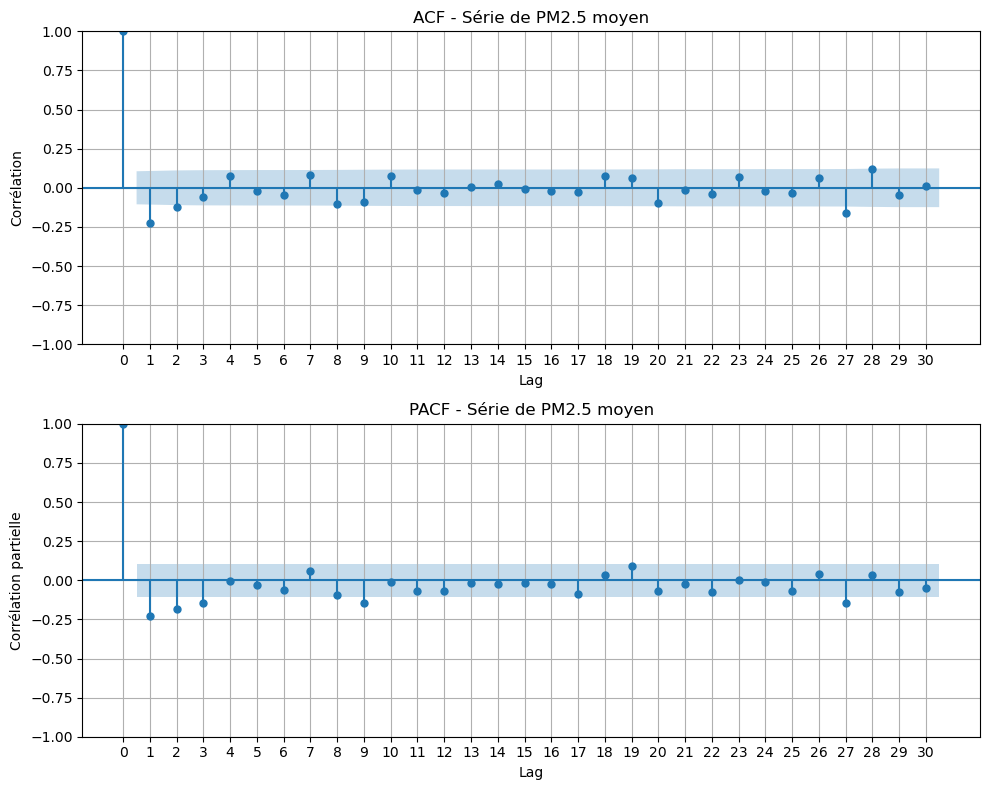

In [58]:
# Créer les subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Tracer l'ACF
plot_acf(differenced, lags=30, zero=True, ax=ax1)
ax1.set_title('ACF - Série de PM2.5 moyen')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Corrélation')
ax1.grid(True)

# Ajuster les graduations sur l'axe x pour l'ACF
ax1.set_xticks(np.arange(0, 31, 1))

# Tracer le PACF
plot_pacf(differenced, lags=30, zero=True, ax=ax2)
ax2.set_title('PACF - Série de PM2.5 moyen')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Corrélation partielle')
ax2.grid(True)

# Ajuster les graduations sur l'axe x pour le PACF
ax2.set_xticks(np.arange(0, 31, 1))

# Ajuster les subplots
plt.tight_layout()

# Afficher le graphique
plt.show()


la série différenciée est stationaire

In [59]:
# Analyse de la stationnarité de la variable
from statsmodels.tsa.stattools import adfuller
from tabulate import tabulate

# Effectuer le test de Dickey-Fuller augmenté
result = adfuller(differenced)

# Formater les résultats dans un tableau
table = [
    ['Valeur de test', result[0]],
    ['P-valeur', result[1]],
    ['Conclusion', 'La série est stationnaire' if result[1] < 0.05 else 'La série est non stationnaire']
]

# Afficher les résultats sous forme de tableau
print(tabulate(table, headers=['Métrique', 'Valeur'], tablefmt='github'))

| Métrique       | Valeur                    |
|----------------|---------------------------|
| Valeur de test | -8.495089362784046        |
| P-valeur       | 1.2823020458413003e-13    |
| Conclusion     | La série est stationnaire |


In [60]:
# Séparer les données en ensemble d'entraînement et ensemble de test avec les indices
train_data = df_pm['PM_25_moyen'][:-15]
test_data = df_pm['PM_25_moyen'][-15:]

# Séparer les indices correspondants
train_index = df_pm.index[:-15]
test_index = df_pm.index[-15:]

# Assurez-vous que les index sont de type datetime
train_data.index = pd.to_datetime(train_index)
test_data.index = pd.to_datetime(test_index)


In [61]:
#!pip install pmdarima

import pmdarima as pm


# Utiliser auto_arima pour trouver le meilleur modèle ARIMA
model_pm = pm.auto_arima(train_data)

print(model_pm.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  330
Model:               SARIMAX(1, 0, 2)   Log Likelihood                -882.431
Date:                Sat, 09 Dec 2023   AIC                           1774.861
Time:                        23:09:23   BIC                           1793.857
Sample:                             0   HQIC                          1782.438
                                - 330                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0375      0.593      3.438      0.001       0.876       3.199
ar.L1          0.8496      0.042     20.250      0.000       0.767       0.932
ma.L1         -0.2212      0.067     -3.311      0.0

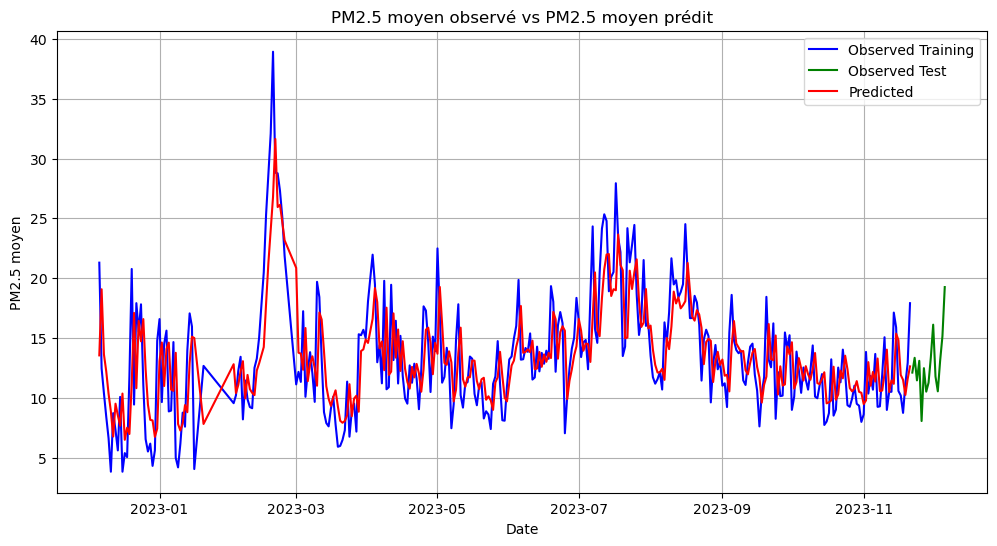

In [62]:
# Faire des prédictions sur l'ensemble d'entraînement
train_pred, train_confint = model_pm.predict_in_sample(return_conf_int=True)

# Faire des prédictions sur l'ensemble de test
n_periods = len(test_data)
predicted, confint = model_pm.predict(n_periods=n_periods, return_conf_int=True)

# Concaténer les prédictions pour l'ensemble d'entraînement et de test
all_predictions = pd.concat([pd.Series(train_pred, index=train_data.index), 
                             pd.Series(predicted, index=test_data.index)], 
                            axis=0)

# Tracer les valeurs réelles et les prédictions pour l'ensemble d'entraînement et de test
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Observed Training', color='blue')
plt.plot(test_data, label='Observed Test', color='green')
plt.plot(all_predictions, label='Predicted', color='red')

plt.xlabel('Date')
plt.ylabel('PM2.5 moyen')
plt.title('PM2.5 moyen observé vs PM2.5 moyen prédit')
plt.legend()
plt.grid(True)
plt.show()


In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Calculer les mesures de performance sur l'ensemble d'entraînement
train_mae = mean_absolute_error(train_data, train_pred)
train_mse = mean_squared_error(train_data, train_pred)
train_rmse = mean_squared_error(train_data, train_pred, squared=False)


# Calculer les mesures de performance sur l'ensemble de test
test_mae = mean_absolute_error(test_data, predicted)
test_mse = mean_squared_error(test_data, predicted)
test_rmse = mean_squared_error(test_data, predicted, squared=False)


# Créer un DataFrame pour afficher les mesures de performance
performance_df = pd.DataFrame({
    'Métrique': ['MAE', 'MSE', 'RMSE'],
    'Ensemble d\'entraînement': [train_mae, train_mse, train_rmse],
    'Ensemble de test': [test_mae, test_mse, test_rmse]
})

print(performance_df)

  Métrique  Ensemble d'entraînement  Ensemble de test
0      MAE                 2.705459          2.746394
1      MSE                12.376155         10.110216
2     RMSE                 3.517976          3.179657


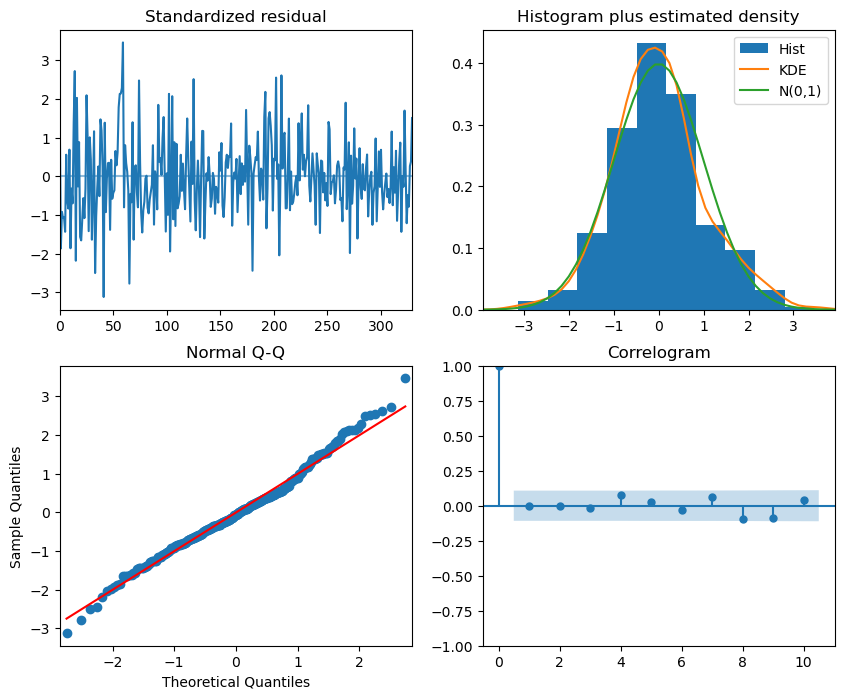

In [64]:
model_pm.plot_diagnostics(figsize=(10,8))
plt.show()

- Résidu standardisé : Les erreurs résiduelles semblent fluctuer autour d'une moyenne de zéro et ont une variance uniforme.
- Histogramme : Le tracé de la densité suggère une distribution normale avec une moyenne légèrement décalée vers la droite.
- Quantiles théoriques : La plupart des points sont parfaitement alignés sur la ligne rouge. Tout écart significatif indique que la distribution est asymétrique.
- Corrélogramme : Le corrélogramme (ou graphique ACF) montre que les erreurs résiduelles ne sont pas autocorrélées. Le tracé ACF impliquerait qu'il existe un modèle dans les erreurs résiduelles qui n'est pas expliqué par le modèle. Nous devrons donc chercher d'autres X (prédicteurs) pour le modèle. Dans l'ensemble, le modèle semble bien adapté. 

### Sauvegarder le modèle de prédiction  de CO moyen et celui de prédiction de PM2.5 moyen pour la station2

In [65]:
# Sauvegarder le modèle avec joblib
joblib.dump(model, 'model_prediction_co_station2.joblib')
joblib.dump(model_pm, 'model_prediction_pm2.5_station2.joblib')

['model_prediction_pm2.5_station2.joblib']